# Báo Cáo Đồ Án Toán Ứng Dụng Và Thống kê

In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pandas.util.testing as tm
import sys
%matplotlib inline
sns.set()

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import sys


# Data Overview


Cho tập dữ liệu về một trang mua bán xe hơi cũ. Tập dữu liệu sẽ gồm 2 phần: X sẽ gồm các thông tin về xe, Phần Y là giá mua bán xe.

### Dữ liệu trong Phần X được mô tả như sau:

In [3]:
df_X = pd.read_csv("X_train.csv")
df_X.head()

,id,manufacturer,model,transmission,color,odometer,year,engineFuel,engineType,engineCapacity,...,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
0,1,Hyundai,i40,automatic,red,48000,2014,gasoline,gasoline,2.0,...,False,True,False,False,False,True,False,False,True,True
1,2,Mitsubishi,Carisma,mechanical,green,320000,2000,diesel,diesel,1.9,...,False,True,False,False,False,False,False,False,False,False
2,3,Volkswagen,T5,mechanical,white,164000,2011,diesel,diesel,2.0,...,False,True,False,True,False,False,True,True,True,False
3,4,Volkswagen,T4 Multivan,mechanical,blue,385672,1998,diesel,diesel,2.5,...,False,True,True,False,False,False,False,False,True,True
4,5,Toyota,Camry,automatic,black,215652,2005,gasoline,gasoline,2.4,...,False,False,False,False,False,False,False,False,False,True


In [4]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              30000 non-null  int64  
 1   manufacturer    30000 non-null  object 
 2   model           30000 non-null  object 
 3   transmission    30000 non-null  object 
 4   color           30000 non-null  object 
 5   odometer        30000 non-null  int64  
 6   year            30000 non-null  int64  
 7   engineFuel      30000 non-null  object 
 8   engineType      30000 non-null  object 
 9   engineCapacity  29991 non-null  float64
 10  bodyType        30000 non-null  object 
 11  drivetrain      30000 non-null  object 
 12  photos          30000 non-null  int64  
 13  feature_0       30000 non-null  bool   
 14  feature_1       30000 non-null  bool   
 15  feature_2       30000 non-null  bool   
 16  feature_3       30000 non-null  bool   
 17  feature_4       30000 non-null 

X gồm  30,000 dòng tương ứng với thông tin của 30,000 xe được ghi lại thông qua các giao dịch và 23 cột tương ứng với 23 thuộc tính của của xe 

| Thuộc tính              | Kiểu dữ liệu | Ý nghĩa                                  |
|:------------------------|:------------:|:----------------------------------------:|
|  manufacturer           |  integer     |    Mã số định danh                       |
|  model                  |  category    |    Tên nhà sản xuất xe hơi               |
|  transmission           |  category    |    Tên mẫu xe                            |
|  color                  |  category    |    Loại hộp số                           |
|  odmeter                |  integer     |    Màu xe                                |
|  year                   |  integer     |    Số km mà xe đã đi                     |
|  engineFuel             |  category    |    Năm sản xuất                          |
|  engineType             |  category    |    Loại nhiên liệu động cơ               |
|  engineCapacity         |  float       |    Dung tích động cơ tính bằng lít       |
|  bodyType               |  category    |    Dạng thân xe                          |
|  driventrain            |  integer     |    Loại hệ thống dẫn động                |
|  photos                 |  integer     |    Số lượng hình ảnh được chụp về xe     |
|  feature0,..., feature9 |  boolean     |    Các đặc trưng khác của xe             |
| ======================= | ============ | =======================================: |

### Dũ liệu trong phần Y được mô tả như sau:


In [5]:
df_Y = pd.read_csv("Y_train.csv")
df_Y.head()

,id,price
0,1,15500.0
1,2,2800.0
2,3,16700.0
3,4,11000.0
4,5,6800.0


- id: mã số định danh
- price: giá xe tính theo USD

$\implies$ Nối 2 tập X,Y thành một tập dữ liệu thống nhất (df) nhằm mục đích phân tích dữ liệu 

In [6]:
df = df_X.set_index('id').join(df_Y.set_index('id')) # nối 2 tập dữ liệu df_X và df_Y thành một tập dữ liệu chung thông qua thuộc tính ID
df.head()

,manufacturer,model,transmission,color,odometer,year,engineFuel,engineType,engineCapacity,bodyType,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,price
id,,,,,,,,,,,,,,,,,,,,,
1,Hyundai,i40,automatic,red,48000,2014,gasoline,gasoline,2.0,sedan,...,True,False,False,False,True,False,False,True,True,15500.0
2,Mitsubishi,Carisma,mechanical,green,320000,2000,diesel,diesel,1.9,hatchback,...,True,False,False,False,False,False,False,False,False,2800.0
3,Volkswagen,T5,mechanical,white,164000,2011,diesel,diesel,2.0,minibus,...,True,False,True,False,False,True,True,True,False,16700.0
4,Volkswagen,T4 Multivan,mechanical,blue,385672,1998,diesel,diesel,2.5,minibus,...,True,True,False,False,False,False,False,True,True,11000.0
5,Toyota,Camry,automatic,black,215652,2005,gasoline,gasoline,2.4,sedan,...,False,False,False,False,False,False,False,False,True,6800.0


Trên đây là 5 mẫu dữ liệu của tập dữ liệu **df** bao gồm cả 2 phần thuộc tính (X) và giá xe (Y) đã được đọc từ file X_train.csv và file y_train.csv

# Data Preprocessing 

### 1. Check null values

In [7]:
df.isnull().sum() # hàm xác định số lượng trường dữ liệu bị thiếu ở mỗi cột

manufacturer      0
model             0
transmission      0
color             0
odometer          0
year              0
engineFuel        0
engineType        0
engineCapacity    9
bodyType          0
drivetrain        0
photos            0
feature_0         0
feature_1         0
feature_2         0
feature_3         0
feature_4         0
feature_5         0
feature_6         0
feature_7         0
feature_8         0
feature_9         0
price             0
dtype: int64

Đa số các thuộc tính đều khộng bị **Missing data** trừ cột **engineCapacity** bị thiếu dữ liệu ở 9 dòng

In [8]:
df['engineCapacity'].fillna(df['engineCapacity'].median(),inplace = True)


Vì số lượng dữ liệu bị thiếu là rất nhỏ nên ta thay thế các giá trị bị thiếu trong cột **engineCapacity** bằng giá trị Median của những mẫu dữ liệu đang có


In [9]:
df.isnull().sum()

manufacturer      0
model             0
transmission      0
color             0
odometer          0
year              0
engineFuel        0
engineType        0
engineCapacity    0
bodyType          0
drivetrain        0
photos            0
feature_0         0
feature_1         0
feature_2         0
feature_3         0
feature_4         0
feature_5         0
feature_6         0
feature_7         0
feature_8         0
feature_9         0
price             0
dtype: int64

### 2. Check duplicate values


In [10]:
df.duplicated().sum()

25

$\implies$ trong tập dữ liệu này có 25 trường dữ liệu bị trùng lắp nhau


In [11]:
duplicated_df = df[df.duplicated()]
duplicated_df

,manufacturer,model,transmission,color,odometer,year,engineFuel,engineType,engineCapacity,bodyType,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,price
id,,,,,,,,,,,,,,,,,,,,,
4242,Skoda,Octavia,mechanical,grey,159000,2009,gasoline,gasoline,1.8,universal,...,False,False,False,False,False,False,False,False,False,8000.0
7808,Renault,19,mechanical,blue,99999,1992,gasoline,gasoline,1.7,sedan,...,False,False,False,False,False,False,False,False,False,10.0
9005,Volkswagen,Golf,mechanical,grey,149000,2015,diesel,diesel,1.6,universal,...,True,False,False,False,True,True,False,True,True,12600.0
9343,Renault,Fluence,mechanical,black,167817,2011,diesel,diesel,1.5,sedan,...,True,False,False,False,False,False,False,True,True,8500.0
10191,Hyundai,Atos,mechanical,silver,150000,2004,gasoline,gasoline,1.1,hatchback,...,False,False,False,False,False,False,False,False,False,3300.0
12817,Citroen,Xantia,mechanical,silver,520000,1998,diesel,diesel,2.1,universal,...,True,False,False,False,False,False,False,False,False,1000.0
13213,Volvo,850,mechanical,blue,300000,1994,diesel,diesel,2.0,sedan,...,True,False,False,True,True,False,False,True,True,2350.0
14585,Audi,A4,mechanical,blue,325000,2002,diesel,diesel,2.5,universal,...,False,False,False,False,False,False,False,False,False,5650.0
14847,Daewoo,Matiz,mechanical,other,221000,2006,gasoline,gasoline,1.0,hatchback,...,False,False,False,False,False,False,False,False,False,950.0


Bảng dữ liệu ở trên là danh sách 25 hàng dữ liệu bị trùng lắp (đã loại bỏ hàng dữ liệu mà đã suất hiện trước đó) 

$\implies$ Ta tiến hành xóa các hàng dữ liệu này

In [12]:
df.drop_duplicates(inplace=True,ignore_index=True)
df

,manufacturer,model,transmission,color,odometer,year,engineFuel,engineType,engineCapacity,bodyType,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,price
0,Hyundai,i40,automatic,red,48000,2014,gasoline,gasoline,2.0,sedan,...,True,False,False,False,True,False,False,True,True,15500.0
1,Mitsubishi,Carisma,mechanical,green,320000,2000,diesel,diesel,1.9,hatchback,...,True,False,False,False,False,False,False,False,False,2800.0
2,Volkswagen,T5,mechanical,white,164000,2011,diesel,diesel,2.0,minibus,...,True,False,True,False,False,True,True,True,False,16700.0
3,Volkswagen,T4 Multivan,mechanical,blue,385672,1998,diesel,diesel,2.5,minibus,...,True,True,False,False,False,False,False,True,True,11000.0
4,Toyota,Camry,automatic,black,215652,2005,gasoline,gasoline,2.4,sedan,...,False,False,False,False,False,False,False,False,True,6800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29970,Acura,TSX,automatic,black,252000,2008,gasoline,gasoline,2.4,sedan,...,True,True,False,True,True,False,True,True,True,9500.0
29971,Ford,Mondeo,mechanical,red,290000,1997,gasoline,gasoline,1.8,sedan,...,False,False,False,False,False,False,False,False,False,1750.0
29972,Mitsubishi,Galant,mechanical,grey,250000,1993,gasoline,gasoline,2.0,hatchback,...,False,False,False,False,False,False,False,False,True,1400.0
29973,Opel,Astra,mechanical,silver,267000,2002,diesel,diesel,1.7,universal,...,True,False,False,False,False,False,False,False,True,3700.0


# Data visualization

### 1. price 

* thống kê cơ bản

In [13]:
df[['price']].describe()

,price
count,29975.000000
mean,6600.751320
std,6097.033735
min,1.000000
25%,2300.000000
50%,4900.000000
75%,8999.000000
max,50000.000000


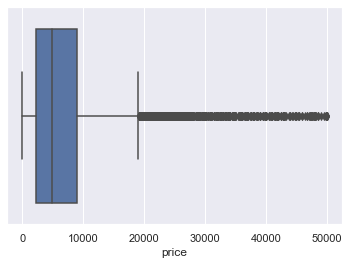

In [14]:
sns.boxplot(df['price'])

Theo dữ liệu thống thì ta thấy giá trị nhỏ nhất ở cột là là 1(USD), điều khá là vô lý khi đây là dữ liệu mua bán xe.

In [15]:
df[df['price']<=10]

,manufacturer,model,transmission,color,odometer,year,engineFuel,engineType,engineCapacity,bodyType,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,price
5691,Mercedes-Benz,T1,mechanical,white,450000,1990,diesel,diesel,2.9,van,...,False,False,False,False,False,False,False,False,False,1.42
6073,Renault,19,mechanical,blue,99999,1992,gasoline,gasoline,1.7,sedan,...,False,False,False,False,False,False,False,False,False,10.00
15792,Mazda,626,mechanical,black,300000,1987,gasoline,gasoline,2.0,coupe,...,False,False,False,False,False,False,False,False,True,1.00
17141,Volkswagen,T4 Caravelle,mechanical,white,1,1995,diesel,diesel,2.4,minibus,...,False,False,False,False,False,False,False,False,False,1.00


Có vẻ đây là những điểm dữ liệu nhiễu, ta sẽ loại khỏi tập dữ liệu

In [16]:
indexs = df[ df.price <= 10 ].index
df.drop(indexs,axis = 0,inplace = True)
df.reset_index(drop=True,inplace=True)
df

,manufacturer,model,transmission,color,odometer,year,engineFuel,engineType,engineCapacity,bodyType,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,price
0,Hyundai,i40,automatic,red,48000,2014,gasoline,gasoline,2.0,sedan,...,True,False,False,False,True,False,False,True,True,15500.0
1,Mitsubishi,Carisma,mechanical,green,320000,2000,diesel,diesel,1.9,hatchback,...,True,False,False,False,False,False,False,False,False,2800.0
2,Volkswagen,T5,mechanical,white,164000,2011,diesel,diesel,2.0,minibus,...,True,False,True,False,False,True,True,True,False,16700.0
3,Volkswagen,T4 Multivan,mechanical,blue,385672,1998,diesel,diesel,2.5,minibus,...,True,True,False,False,False,False,False,True,True,11000.0
4,Toyota,Camry,automatic,black,215652,2005,gasoline,gasoline,2.4,sedan,...,False,False,False,False,False,False,False,False,True,6800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29966,Acura,TSX,automatic,black,252000,2008,gasoline,gasoline,2.4,sedan,...,True,True,False,True,True,False,True,True,True,9500.0
29967,Ford,Mondeo,mechanical,red,290000,1997,gasoline,gasoline,1.8,sedan,...,False,False,False,False,False,False,False,False,False,1750.0
29968,Mitsubishi,Galant,mechanical,grey,250000,1993,gasoline,gasoline,2.0,hatchback,...,False,False,False,False,False,False,False,False,True,1400.0
29969,Opel,Astra,mechanical,silver,267000,2002,diesel,diesel,1.7,universal,...,True,False,False,False,False,False,False,False,True,3700.0


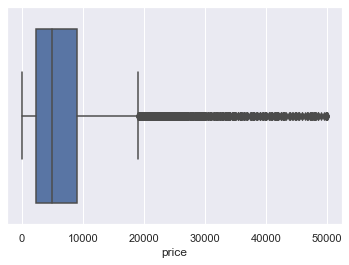

In [17]:
sns.boxplot(df['price'])

In [18]:
df[['price']].describe()

,price
count,29971.000000
mean,6601.631824
std,6096.964149
min,100.000000
25%,2300.000000
50%,4900.000000
75%,8999.000000
max,50000.000000


* kiểm tra phân bố của các giá trị

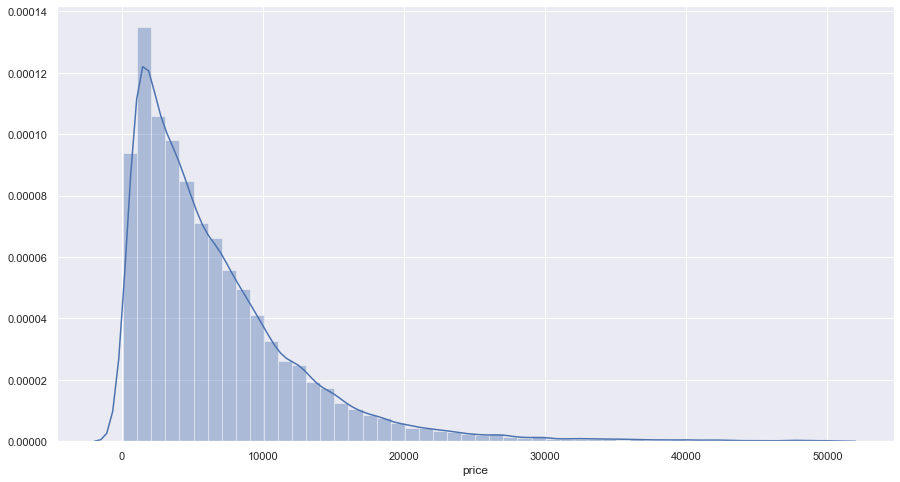

In [19]:
f, ax = plt.subplots(figsize=(15,8))
sns.distplot(df['price'])

$\implies$ từ biểu đồ historgram ta nhận thấy được rằng class price của tập dữ liệu khá lệch 

kiểm tra lại với hàm của thư viện pandas ta có thể thấy được độ lệch cũng khá lớn (TODO: tìm hiểu để hiểu rõ độ skew và kurt là gì ? )


In [20]:
print(df['price'].skew())
print(df['price'].kurt())

2.174618513167536
7.31112336868377


Ta biến đổi giá trị của cột này bằng các biến đổi khác nhau như log-transform, root squared tansform và box cox transform để xem thử có cải thiện được tình trạng dữ liệu bị lệch hay không 

##### a) log transform

In [21]:
price_df = pd.DataFrame(np.log1p(df['price'].values))
price_df

,0
0,9.648660
1,7.937732
2,9.723224
3,9.305741
4,8.824825
...,...
29966,9.159152
29967,7.467942
29968,7.244942
29969,8.216358


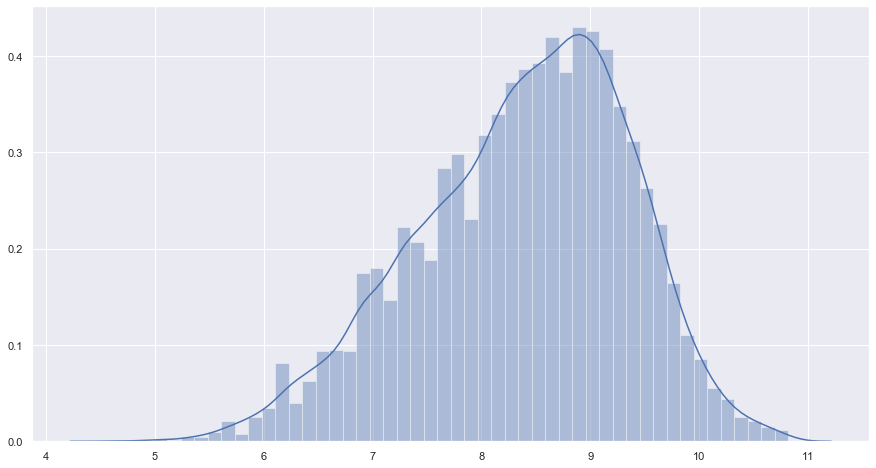

In [22]:
f, ax = plt.subplots(figsize=(15,8))
sns.distplot(price_df)

có vẻ đã cải thiện được chút ít

In [23]:
print(np.log1p(df['price'].skew()))
print(np.log1p(df['price'].kurt()))

1.1551874717926056
2.1175947824847547


$\implies$ có cải thiện nhưng vẫn còn khá lệch

##### b) root squared  transform

In [24]:
price_df = pd.DataFrame(np.sqrt(df['price'].values))
price_df

,0
0,124.498996
1,52.915026
2,129.228480
3,104.880885
4,82.462113
...,...
29966,97.467943
29967,41.833001
29968,37.416574
29969,60.827625


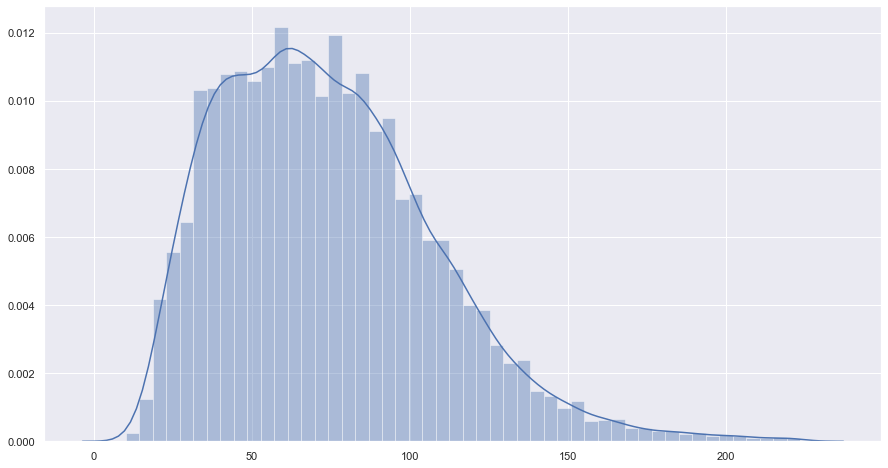

In [25]:
f, ax = plt.subplots(figsize=(15,8))
sns.distplot(price_df)

In [26]:
print(price_df[0].skew())
print(price_df[0].kurt())

0.7645352759996838
0.7022228330277138


$\implies$ 

##### c) box cox transform

In [27]:
from scipy import stats
price_df ,max_log = stats.boxcox(df_Y['price'])[:2]
price_df = pd.DataFrame(price_df)

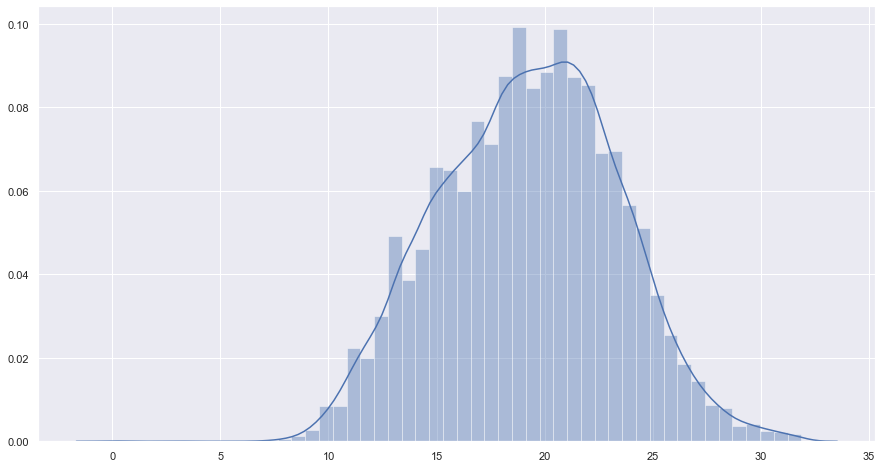

In [28]:
f, ax = plt.subplots(figsize=(15,8))
sns.distplot(price_df)

In [29]:
print(price_df[0].skew())
print(price_df[0].kurt())

-0.019823150666023612
-0.3349213142505807


$\implies$ phép biến đổi này cho kết quả tốt nhất

### 2. Manufacturer 

Đây là cốt chứa thông tin của nhà sản xuất của các xe, ta sẽ khảo sát về phân bố và ảnh hưởng của thuộc tính này với giá của xe

In [30]:
names = df['manufacturer'].unique() # in ra danh sách các nhà sản xuất
names

array(['Hyundai', 'Mitsubishi', 'Volkswagen', 'Toyota', 'Chery', 'Opel',
       'Audi', 'Nissan', 'Dodge', 'Kia', 'Fiat', 'Ford', 'Mercedes-Benz',
       'Renault', 'Seat', 'Mazda', 'Peugeot', 'BMW', 'Chrysler',
       'Chevrolet', 'Citroen', 'Skoda', 'Lifan', 'Cadillac', 'Subaru',
       'Land Rover', 'Jeep', 'Volvo', 'Infiniti', 'Honda', 'Lexus',
       'Lancia', 'Jaguar', 'Buick', 'Suzuki', 'SsangYong', 'Rover',
       'Pontiac', 'Iveco', 'Acura', 'Porsche', 'Lincoln', 'Daewoo',
       'Dacia', 'Saab', 'Mini', 'LADA', 'Great Wall', 'Alfa Romeo',
       'Geely'], dtype=object)

In [31]:
print('Tổng cổng có {} hãng sản xuất có trong tập dữ liệu này!'.format(len(df.manufacturer.unique())))

Tổng cổng có 50 hãng sản xuất có trong tập dữ liệu này!


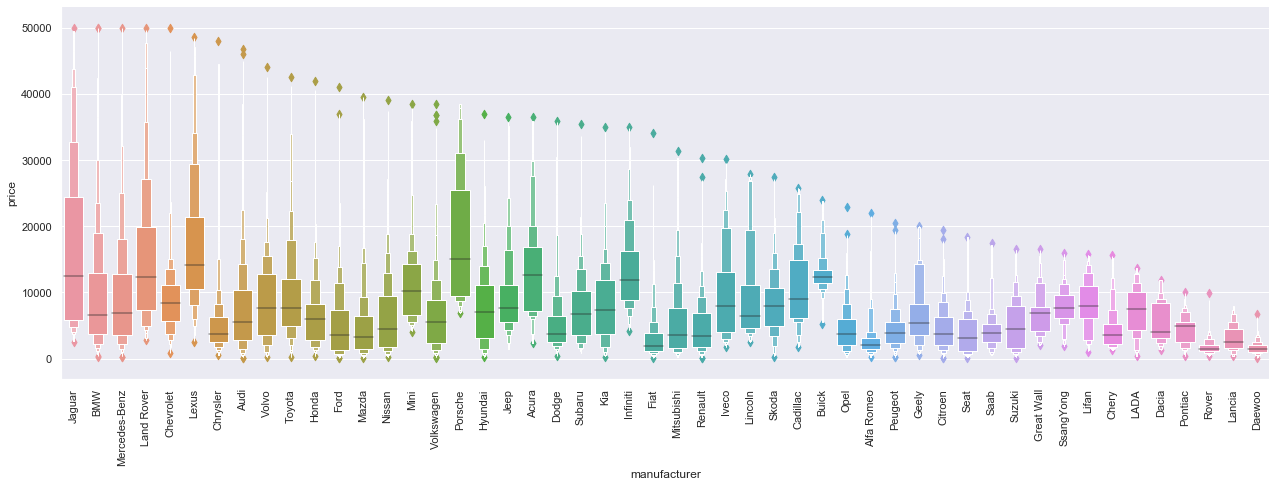

In [32]:
var = 'manufacturer'
sns.catplot(y='price',x=var,data= df.sort_values('price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show
plt.xticks(rotation=90);

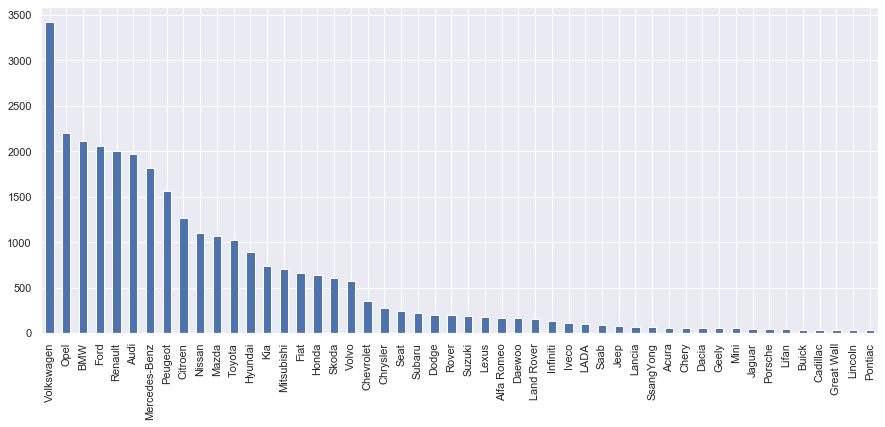

In [33]:
df['manufacturer'].value_counts().plot(kind = 'bar',figsize =(15,6))

Theo biểu đồ trên thì có ta thấy được Janguar có phân bố giá xe cao nhất

Và mỗi loại nhà sản xuất sẽ có các khoảng phân bố giá khác nhau, nên có lẽ thuộc tính này sẽ giúp ta dự đoán giá tốt hơn

#### 2. Model

mỗi loại xe lại có các mẫu xe khác nhau, ta sẽ khảo sát thuộc tính mẫu xe của tập dữ liệu

In [34]:
print('Tông cổng có {} mẫu xe trong tập dữ liệu '.format(len(df['model'].unique())))

Tông cổng có 992 mẫu xe trong tập dữ liệu 


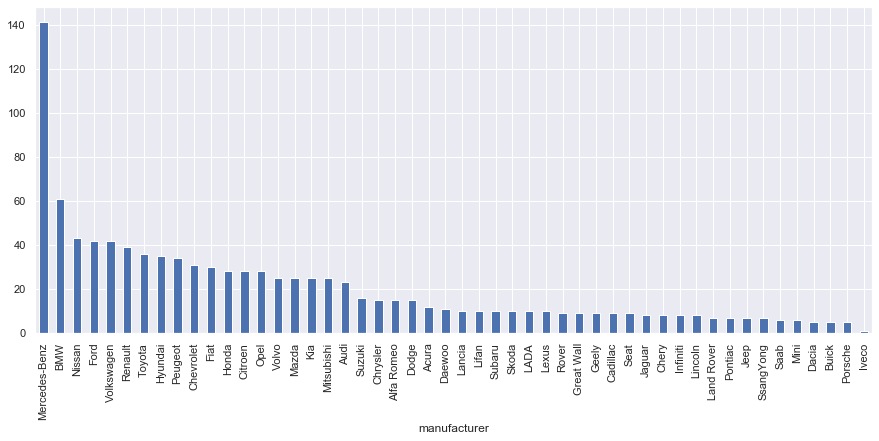

In [35]:
s = df.groupby("manufacturer").model.agg(lambda x:len(x.unique()))
s.sort_values(ascending= False).plot(kind="bar",figsize=(15,6))

In [36]:
var = 'model'
model = df[[var]]
model = pd.get_dummies(model)
model_names = df[var].value_counts()[df[var].value_counts() <= 10].index.tolist()
model_names = ['model_' + model for model in model_names]
model.drop(model_names ,axis=1,inplace=True)

Tập dữ liệu này có khá nhiều loại model và mỗi loại nhà sản xuất lại có số lượng model khác nhau, có vẻ thuộc tính này sẽ không hiệu quả khi sử dụng để dự đoán giá xe

In [37]:
# var = 'model'
# sns.catplot(y='price',x=var,data= df.sort_values('price',ascending=False),kind="boxen",height=6, aspect=3)
# plt.show
# plt.xticks(rotation=90);

tuy nhiên mỗi model lại có khoảng phân bố giá khác nhau, vậy để sử dụng thuộc tính này có lẽ ta nên chia các model thành 3 nhóm cao, trung bình và thấp theo mức giá để sử dụng dự đoan giá xe

In [38]:
model = pd.DataFrame(df.groupby("model").mean()['price'])
model['model'] = model.index
# model.set_index(map(int,range(992)),inplace=True)
model

,price,model
model,,
100,1534.993058,100
1007,4450.000000,1007
100NX,766.420000,100NX
106,1408.000000,106
107,4270.435000,107
...,...,...
i30,7822.111111,i30
i40,13090.954545,i40
ix20,7200.000000,ix20


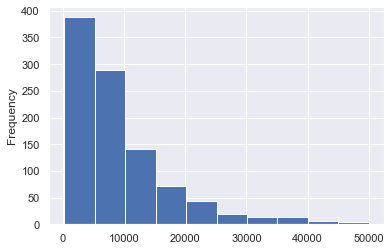

In [39]:
model['price'].plot(kind='hist')

từ biểu đồ trên ta sẽ chia model thành 3 loại từ 0->5,000; 5000->20,000 và từ 20,000->50,000 tương ứng với 3 loại giá tương ứng với các giá trị 1,2 và 3

In [40]:
models = df.model.copy()
def convert(x):
    if 0<x<=5000:
        return 1
    elif 5000<x<=20000:
        return 2
    else :
        return 3    
model['kind'] = model.price.apply(convert)
model

,price,model,kind
model,,,
100,1534.993058,100,1
1007,4450.000000,1007,1
100NX,766.420000,100NX,1
106,1408.000000,106,1
107,4270.435000,107,1
...,...,...,...
i30,7822.111111,i30,2
i40,13090.954545,i40,2
ix20,7200.000000,ix20,2


In [41]:
a = dict(zip(model.model, model.kind))
model_hased = df.model.apply(lambda x: a[x])
model_hased

0        2
1        1
2        2
3        2
4        2
        ..
29966    2
29967    1
29968    1
29969    1
29970    2
Name: model, Length: 29971, dtype: int64

#### 4. Transmisssion

Đây là thuộc tính category thể hiện loại hộp số của xe, tập giá trị của thuộc tính này là :

In [42]:
df.transmission.unique()

array(['automatic', 'mechanical'], dtype=object)

Số điểm dữ liệu của mỗi loại hộp số là:

In [43]:
var = 'transmission'
df[var].value_counts()

mechanical    19906
automatic     10065
Name: transmission, dtype: int64

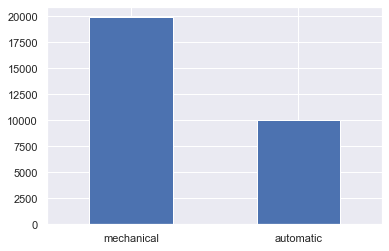

In [44]:
df[var].value_counts().plot(kind = 'bar')
plt.xticks(rotation = 0);

Phân bô dữ liệu của mỗi loại hộp số theo giá tiền xe:

<function matplotlib.pyplot.show(*args, **kw)>

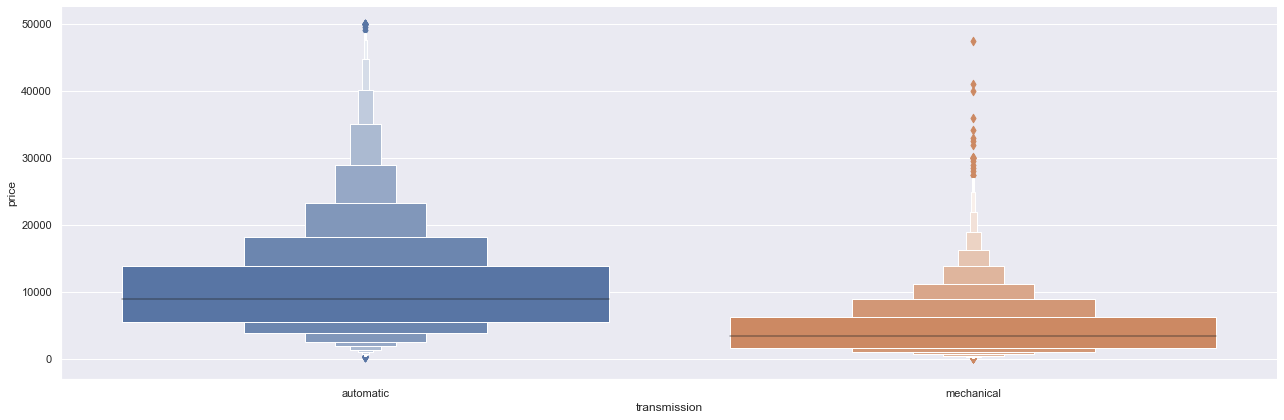

In [45]:
sns.catplot(y='price',x=var,data= df.sort_values('price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

Theo biểu đồ trên thì có vẻ hộp số tự động sẽ có giá tiền cao hơn, tuy nhiên miền giá của cả 2 loại khá rộng

Tuy nhiên theo biểu đồ thì có vẻ loại hộp số sàn có vẻ có outlier

In [46]:
 df[(df['transmission'] == 'mechanical') & (df['price'] > 35000)]

,manufacturer,model,transmission,color,odometer,year,engineFuel,engineType,engineCapacity,bodyType,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,price
18750,Land Rover,Defender,mechanical,green,30452,2014,diesel,diesel,2.2,suv,...,True,True,False,False,True,False,False,False,False,39900.0
22274,Mercedes-Benz,Sprinter,mechanical,white,340000,2014,diesel,diesel,2.2,minibus,...,True,True,False,False,False,False,False,True,True,41000.0
25475,Lexus,NX,mechanical,white,10,2019,gasoline,gasoline,2.0,suv,...,False,False,False,False,False,False,False,False,False,47400.0
27418,Toyota,Land Cruiser,mechanical,blue,284000,2009,diesel,diesel,4.2,suv,...,False,False,False,True,False,False,False,False,False,36000.0


In [47]:
indexs = df[(df['transmission'] == 'mechanical') & (df['price'] > 35000)].index

df.drop(indexs,axis = 0,inplace = True)
df.reset_index(drop =True,inplace=True)
df 


,manufacturer,model,transmission,color,odometer,year,engineFuel,engineType,engineCapacity,bodyType,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,price
0,Hyundai,i40,automatic,red,48000,2014,gasoline,gasoline,2.0,sedan,...,True,False,False,False,True,False,False,True,True,15500.0
1,Mitsubishi,Carisma,mechanical,green,320000,2000,diesel,diesel,1.9,hatchback,...,True,False,False,False,False,False,False,False,False,2800.0
2,Volkswagen,T5,mechanical,white,164000,2011,diesel,diesel,2.0,minibus,...,True,False,True,False,False,True,True,True,False,16700.0
3,Volkswagen,T4 Multivan,mechanical,blue,385672,1998,diesel,diesel,2.5,minibus,...,True,True,False,False,False,False,False,True,True,11000.0
4,Toyota,Camry,automatic,black,215652,2005,gasoline,gasoline,2.4,sedan,...,False,False,False,False,False,False,False,False,True,6800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29962,Acura,TSX,automatic,black,252000,2008,gasoline,gasoline,2.4,sedan,...,True,True,False,True,True,False,True,True,True,9500.0
29963,Ford,Mondeo,mechanical,red,290000,1997,gasoline,gasoline,1.8,sedan,...,False,False,False,False,False,False,False,False,False,1750.0
29964,Mitsubishi,Galant,mechanical,grey,250000,1993,gasoline,gasoline,2.0,hatchback,...,False,False,False,False,False,False,False,False,True,1400.0
29965,Opel,Astra,mechanical,silver,267000,2002,diesel,diesel,1.7,universal,...,True,False,False,False,False,False,False,False,True,3700.0


#### 5.color

In [48]:
var = 'color'
df[var].value_counts()

black     6110
silver    5420
blue      4505
white     3241
grey      2995
red       2265
green     2032
other     2023
brown      660
violet     371
yellow     212
orange     133
Name: color, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

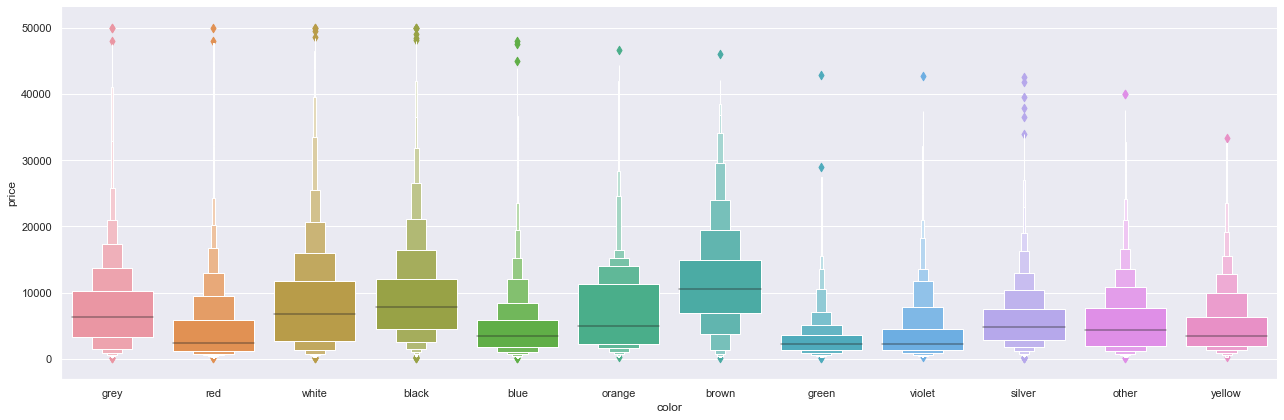

In [49]:
sns.catplot(y='price',x=var,data= df.sort_values('price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

#### 6.odmeter

Đây là thuộc tính thể hiện số lượng km đã đi của xe 

In [50]:
df[['odometer']].describe()

,odometer
count,29967.000000
mean,252881.652384
std,131392.224232
min,1.000000
25%,163000.000000
50%,250000.000000
75%,326426.000000
max,1000000.000000


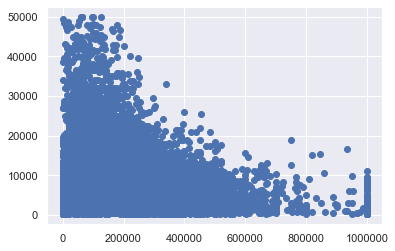

In [51]:
plt.scatter(x=df.odometer,y=df.price)

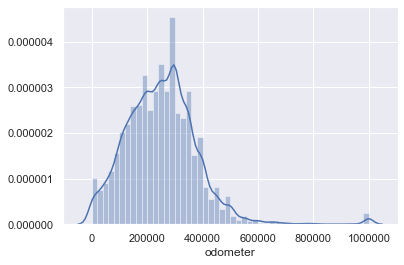

In [52]:
sns.distplot(df.odometer)

0    0.034907
dtype: float64
0    1.552627
dtype: float64


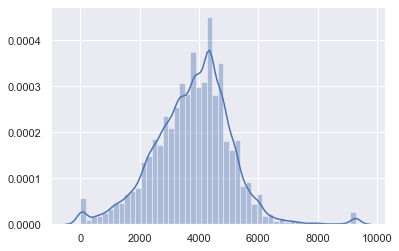

In [53]:
a,max_log_odo = stats.boxcox(df['odometer'])[:2]
a = pd.DataFrame(a)
print(a.skew())
print(a.kurt())
sns.distplot(a)

#### 7.year

In [54]:
import datetime
now = datetime.datetime.now()
year  = pd.DataFrame(df['year'].apply(lambda x : now.year - x))


In [55]:
year.describe()

,year
count,29967.000000
mean,16.871592
std,7.514648
min,1.000000
25%,11.000000
50%,17.000000
75%,22.000000
max,60.000000


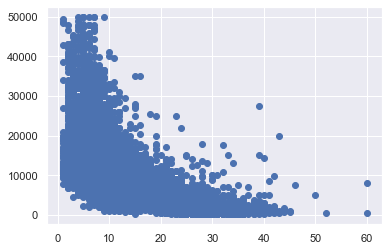

In [56]:
plt.scatter(x=year,y=df.price)

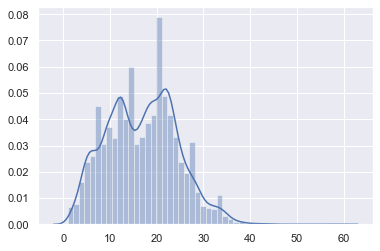

In [57]:
sns.distplot(year)

In [58]:
print(year.skew())
print(year.kurt())

year    0.197887
dtype: float64
year   -0.415021
dtype: float64


#### 8. engineFuel

In [59]:
var = 'engineFuel'
df[var].value_counts()

gasoline         19066
diesel           10693
hybrid-petrol      198
electric             9
hybrid-diesel        1
Name: engineFuel, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

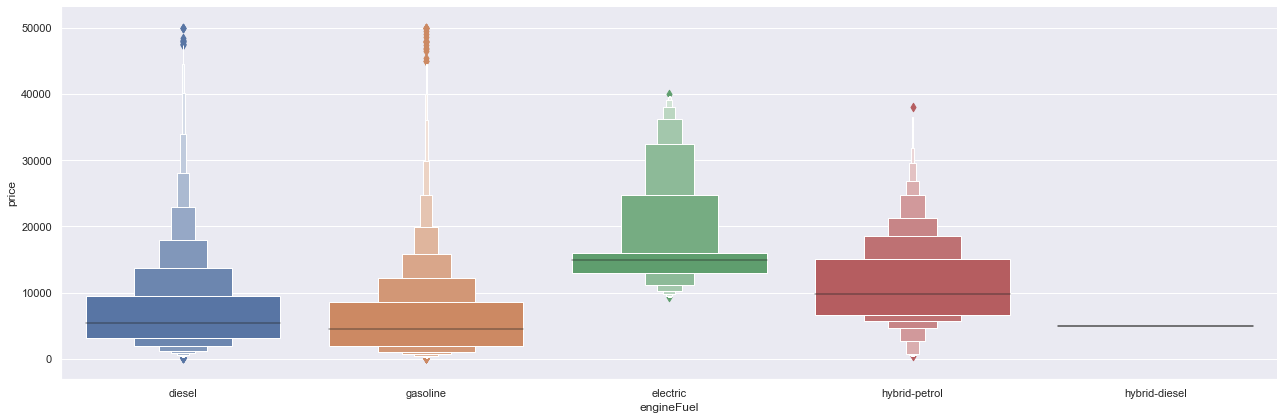

In [60]:
sns.catplot(y='price',x=var,data= df.sort_values('price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [61]:
var = 'engineFuel'
engineFuel = df[[var]]
engineFuel = pd.get_dummies(engineFuel).drop('engineFuel_hybrid-diesel',axis = 1)
engineFuel

,engineFuel_diesel,engineFuel_electric,engineFuel_gasoline,engineFuel_hybrid-petrol
0,0,0,1,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
29962,0,0,1,0
29963,0,0,1,0
29964,0,0,1,0
29965,1,0,0,0


#### 9. engineType

In [62]:

var = 'engineType'

df[var].value_counts()


gasoline    19264
diesel      10694
electric        9
Name: engineType, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

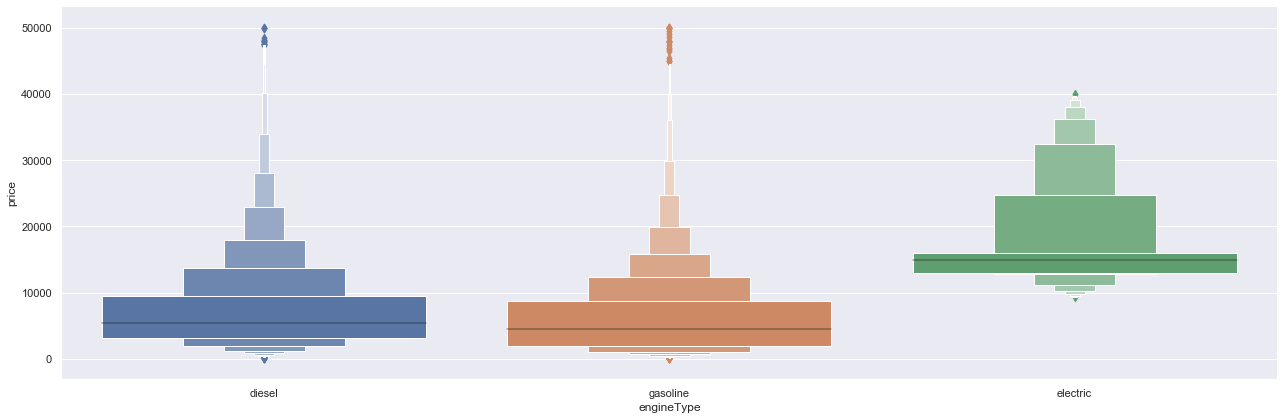

In [63]:
sns.catplot(y='price',x=var,data= df.sort_values('price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

#### 10. engineCapacity

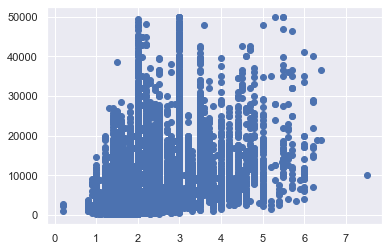

In [64]:
plt.scatter(x=df.engineCapacity,y=df.price)

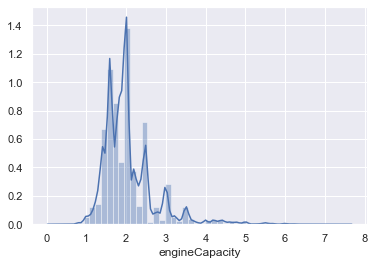

In [65]:
sns.distplot(df.engineCapacity)

In [66]:
df[(df.engineCapacity >=7)  & (df.price <= 10000)].values

array([['Ford', 'Econoline', 'automatic', 'black', 259104, 1996,
        'gasoline', 'gasoline', 7.5, 'minibus', 'rear', 11, False, True,
        False, False, False, False, False, False, False, True, 10000.0]],
      dtype=object)

#### 11. bodyType

In [67]:
var = 'bodyType'
df[var].value_counts()



sedan        9886
hatchback    6132
universal    4430
suv          3861
minivan      2807
minibus      1083
van           637
coupe         517
liftback      449
pickup         91
cabriolet      63
limousine      11
Name: bodyType, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

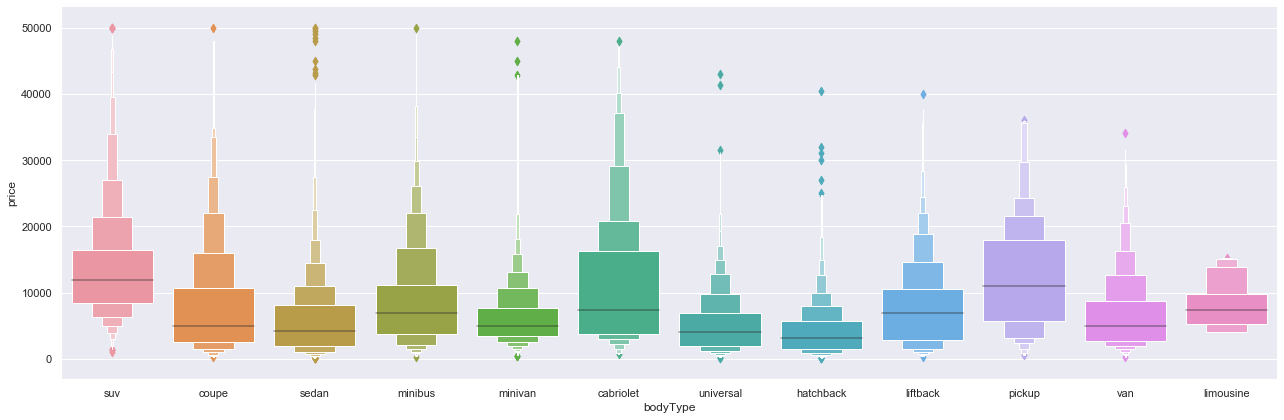

In [68]:
sns.catplot(y='price',x=var,data= df.sort_values('price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [69]:
bodyType = df[[var]]
bodyType = pd.get_dummies(bodyType,drop_first= True)

#### 12. Drivetrain

In [70]:
var = 'drivetrain'
df[var].value_counts()


front    21914
all       4029
rear      4024
Name: drivetrain, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

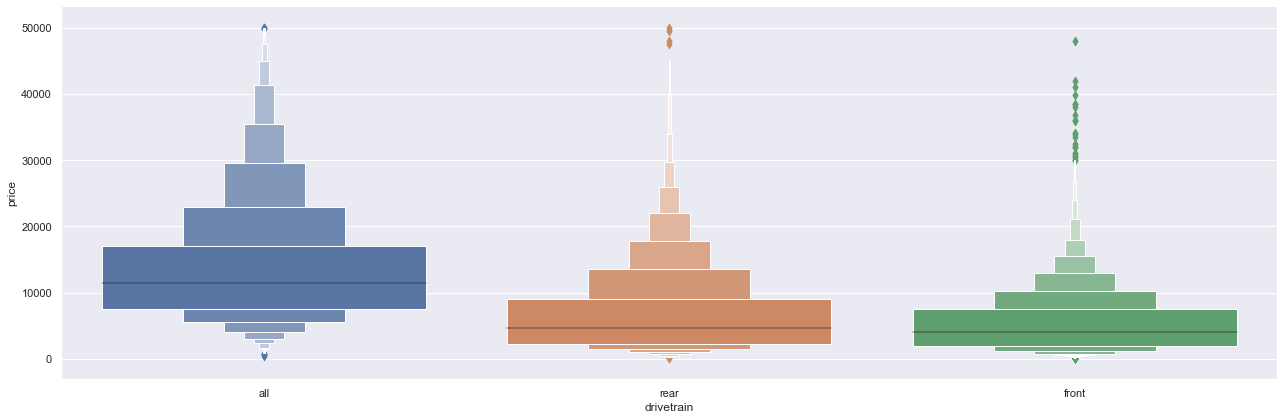

In [71]:
sns.catplot(y='price',x=var,data= df.sort_values('price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [72]:
drivetrain = df[[var]]
drivetrain = pd.get_dummies(drivetrain)

# New feature

In [73]:
now = datetime.datetime.now()
age = df['year'].apply(lambda x : now.year - x)

In [74]:
km_year = df['odometer']/age

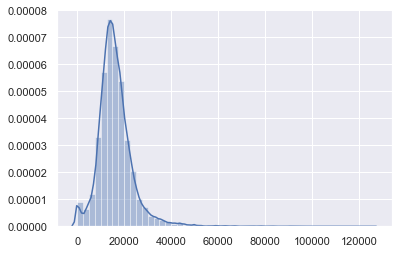

In [75]:
sns.distplot(km_year)

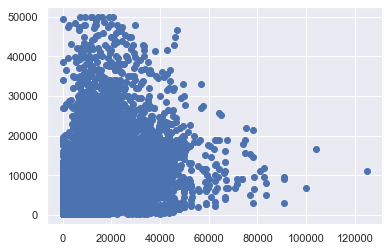

In [76]:
plt.scatter(x=km_year,y=df.price)

# Build Model

In [77]:
# Cell này dùng để test trước khi làm D:
from scipy import stats
import datetime
test = df.copy()

# price 
test['price'],max_log = stats.boxcox(test['price'])[:2]

# manufacturer 
manufacturer = test[["manufacturer"]]
manufacturer = pd.get_dummies(manufacturer,drop_first= True)
manufacturer.head()

# transmission
var = 'transmission'
Transmission = test[[var]]
Transmission = pd.get_dummies(Transmission,drop_first= True)

# color
var = 'color'
#test.drop(["color"],axis=1,inplace=True)
color = test[[var]]
color = pd.get_dummies(color,drop_first= True)



# engine Fuel
var = 'engineFuel'
engineFuel = test[[var]]
engineFuel = pd.get_dummies(engineFuel,drop_first =True)#.drop('engineFuel_hybrid-diesel',axis = 1)



var = 'engineType'
engineType = test[[var]]
engineType = pd.get_dummies(engineType)

#body type
var = 'bodyType'
bodyType = test[[var]]
bodyType = pd.get_dummies(bodyType,drop_first= True)



# drivertrain
var = 'drivetrain'
drivetrain = test[[var]]
drivetrain = pd.get_dummies(drivetrain)

# year 

now = datetime.datetime.now()
test['year'] = test['year'].apply(lambda x : now.year - x)

# model 
# model = pd.DataFrame(test.groupby("model").mean()['price'])
# model['model'] = model.index
# def convert(x):
#     if 0<x<=5000:
#         return 'low'
#     elif 5000<x<=20000:
#         return 'medium'
#     else :
#         return 'high'    

# model['kind'] = model.price.apply(convert)
# a = dict(zip(model.model, model.kind))
# test.model = df.model.apply(lambda x: a[x])
# model  = pd.get_dummies(test.model)

var = 'model'
model = test[[var]]
model = pd.get_dummies(model,drop_first =True)
#model_names = test[var].value_counts()[test[var].value_counts() <= 10].index.tolist()
#model_names = ['model_' + model for model in model_names]
#model.drop(model_names ,axis=1,inplace=True)


test = pd.concat([test,Transmission,drivetrain,bodyType,engineType,manufacturer,color,engineFuel,model],axis=1)
test['km_per_year2'] = (test['odometer']/ test['year'])**2

test.drop(["model","manufacturer","transmission","engineType","bodyType","drivetrain","model","engineFuel","color"],axis=1,inplace=True)


#test['odometer'],max_log_odo = stats.boxcox(test['odometer'])[:2]


X = test.drop(["price",],axis=1)
y = test.loc[:,['price']]


X['year_2'] =X['year']**2
X['year_3'] = X['year']**3




from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor



linear_reg = RandomForestRegressor()
linear_reg.fit(X_train, y_train)

y_pred= linear_reg.predict(X_test)
print("Accuracy on Traing set: ",linear_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",linear_reg.score(X_test,y_test))

from scipy.special import boxcox, inv_boxcox
y_pred = inv_boxcox(y_pred,max_log)
y_test = inv_boxcox(y_test,max_log)

from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error



print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error((y_test) , (y_pred)))
print('Mean Squared  Error      : ', metrics.mean_squared_error((y_test) , (y_pred)))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error((y_test) , (y_pred))))
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred))






C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:108: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Accuracy on Traing set:  0.9886007792749382
Accuracy on Testing set:  0.9164806806416637
		Error Table
Mean Absolute Error      :  1020.7377576741823
Mean Squared  Error      :  3111692.245589426
Root Mean Squared  Error :  1763.9989358243463
R Squared Error          :  0.9130832394017256


In [78]:
np.where(~np.isfinite(y_pred))

(array([], dtype=int64),)

In [79]:
0.861700330848187

0.861700330848187

In [80]:
  0.08704574277807464

0.08704574277807464

In [81]:
X

,odometer,year,engineCapacity,photos,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,...,model_i20,model_i3,model_i30,model_i40,model_ix20,model_ix35,model_ix55,km_per_year2,year_2,year_3
0,48000,6,2.0,1,False,True,False,False,False,True,...,0,0,0,1,0,0,0,6.400000e+07,36,216
1,320000,20,1.9,13,False,True,False,False,False,False,...,0,0,0,0,0,0,0,2.560000e+08,400,8000
2,164000,9,2.0,14,False,True,False,True,False,False,...,0,0,0,0,0,0,0,3.320494e+08,81,729
3,385672,22,2.5,1,False,True,True,False,False,False,...,0,0,0,0,0,0,0,3.073200e+08,484,10648
4,215652,15,2.4,12,False,False,False,False,False,False,...,0,0,0,0,0,0,0,2.066924e+08,225,3375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29962,252000,12,2.4,6,False,True,True,False,True,True,...,0,0,0,0,0,0,0,4.410000e+08,144,1728
29963,290000,23,1.8,9,True,False,False,False,False,False,...,0,0,0,0,0,0,0,1.589792e+08,529,12167
29964,250000,27,2.0,7,False,False,False,False,False,False,...,0,0,0,0,0,0,0,8.573388e+07,729,19683
29965,267000,18,1.7,6,False,True,False,False,False,False,...,0,0,0,0,0,0,0,2.200278e+08,324,5832


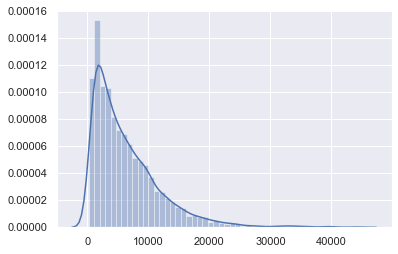

In [82]:
sns.distplot(y_pred)